# Get started with Gemma using KerasNLP

This tutorial shows you how to get started with Gemma using [KerasNLP](https://keras.io/keras_nlp/). Gemma is a family of lightweight, state-of-the art open models built from the same research and technology used to create the Gemini models. KerasNLP is a collection of natural language processing (NLP) models implemented in [Keras](https://keras.io/) and runnable on JAX, PyTorch, and TensorFlow.

In this tutorial, you'll use Gemma to generate text responses to several prompts. If you're new to Keras, you might want to read [Getting started with Keras](https://keras.io/getting_started/) before you begin, but you don't have to. You'll learn more about Keras as you work through this tutorial.

## Setup

### Gemma setup

To complete this tutorial, you'll first need to complete the setup instructions at [Gemma setup](https://ai.google.dev/gemma/docs/setup). The Gemma setup instructions show you how to do the following:

* Get access to Gemma on kaggle.com.
* Select a Colab runtime with sufficient resources to run
  the Gemma 2B model.
* Generate and configure a Kaggle username and API key.

After you've completed the Gemma setup, move on to the next section, where you'll set environment variables for your Colab environment.


### Set environment variables

Set environment variables for `KAGGLE_USERNAME` and `KAGGLE_KEY`.

In [4]:
! pip install kaggle

In [2]:
import os
from google.colab import userdata

# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate for your system.
os.environ["KAGGLE_USERNAME"] = "maheshjadhav7979"
os.environ["KAGGLE_KEY"] = "4c93274a7b0bf2470a0bdc1be6c10968"

### Install dependencies

Install Keras and KerasNLP.

In [8]:
pip install --upgrade keras

In [9]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


### Import packages

Import Keras and KerasNLP.

In [3]:
import keras
import keras_nlp

### Select a backend

Keras is a high-level, multi-framework deep learning API designed for simplicity and ease of use. [Keras 3](https://keras.io/keras_3) lets you choose the backend: TensorFlow, JAX, or PyTorch. All three will work for this tutorial.

In [4]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # Or "tensorflow" or "torch".
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

## Create a model

KerasNLP provides implementations of many popular [model architectures](https://keras.io/api/keras_nlp/models/). In this tutorial, you'll create a model using `GemmaCausalLM`, an end-to-end Gemma model for causal language modeling. A causal language model predicts the next token based on previous tokens.

Create the model using the `from_preset` method:

In [5]:
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")


Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/1' to your Colab notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/1' to your Colab notebook...
Attaching 'model.weights.h5' from model 'keras/gemma/keras/gemma_2b_en/1' to your Colab notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/1' to your Colab notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/gemma/keras/gemma_2b_en/1' to your Colab notebook...


`from_preset` instantiates the model from a preset architecture and weights. In the code above, the string `"gemma_2b_en"` specifies the preset architecture: a Gemma model with 2 billion parameters. (A Gemma model with 7 billion parameters is also available. To run the larger model in Colab, you need access to the premium GPUs available in paid plans. Alternatively, you can perform [distributed tuning on a Gemma 7B model](https://ai.google.dev/gemma/docs/distributed_tuning) on Kaggle or Google Cloud.)

Use `summary` to get more info about the model:

In [6]:
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,506,172,416 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,506,172,416 (9.34 GB)

 Trainable params: 2,506,172,416 (9.34 GB)

 Non-trainable params: 0 (0.00 B)

As you can see from the summary, the model has 2.5 billion trainable parameters.

## Generate text

Now it's time to generate some text! The model has a `generate` method that generates text based on a prompt. The optional `max_length` argument specifies the maximum length of the generated sequence.

Try it out with the prompt `"What is the meaning of life?"`.

In [15]:
gemma_lm.generate("What is the meaning of AI?", max_length=64)

'What is the meaning of AI?\n\nThe meaning of AI is Artificial Intelligence.\n\nWhat is the meaning of AI in the context of the Internet of Things?\n\nThe meaning of AI in the context of the Internet of Things is Artificial Intelligence.\n\nWhat is the meaning of AI in the context of the Internet of'

Try calling `generate` again with a different prompt.

In [16]:
gemma_lm.generate("How does the Heart works in Human Body?", max_length=64)

'How does the Heart works in Human Body?\n\nAnswer:\n\nStep 1/6\n1. The heart is a muscular organ that pumps blood throughout the body.\n\nStep 2/6\n2. The heart is divided into four chambers: two atria (upper chambers) and two ventricles ('

If you're running on JAX or TensorFlow backends, you'll notice that the second `generate` call returns nearly instantly. This is because each call to `generate` for a given batch size and `max_length` is compiled with XLA. The first run is expensive, but subsequent runs are much faster.

You can also provide batched prompts using a list as input:

In [17]:
gemma_lm.generate(
    ["What is the meaning of Machine Learning?",
     "How does the Human body works?"],
    max_length=64)

['What is the meaning of Machine Learning?\n\nMachine Learning is a branch of Artificial Intelligence that deals with the study of algorithms and statistical models that computer systems use to perform tasks without being explicitly programmed.\n\nMachine Learning is a subset of Artificial Intelligence.\n\nMachine Learning is a branch of Artificial Intelligence that deals with the study',
 'How does the Human body works?\n\nThe human body is a complex system of organs, tissues, and cells that work together to maintain homeostasis. The body is made up of three main systems: the nervous system, the endocrine system, and the immune system. The nervous system is responsible for controlling and coordinating the body']

### Optional: Try a different sampler

You can control the generation strategy for `GemmaCausalLM` by setting the `sampler` argument on `compile()`. By default, [`"greedy"`](https://keras.io/api/keras_nlp/samplers/greedy_sampler/#greedysampler-class) sampling will be used.

As an experiment, try setting a [`"top_k"`](https://keras.io/api/keras_nlp/samplers/top_k_sampler/) strategy:

In [ ]:
gemma_lm.compile(sampler="top_k")
gemma_lm.generate("What is the meaning of life?", max_length=64)

'What is the meaning of life? That was a question I asked myself as I was driving home from work one night in 2012. I was driving through the city of San Bernardino, and all I could think was, “What the heck am I doing?”\n\nMy life was completely different. I'

While the default greedy algorithm always picks the token with the largest probability, the top-K algorithm randomly picks the next token from the tokens of top K probability.

You don't have to specify a sampler, and you can ignore the last code snippet if it's not helpful to your use case. If you'd like learn more about the available samplers, see [Samplers](https://keras.io/api/keras_nlp/samplers/).

# Fine-tune Gemma models in Keras using LoRA

# Load Dataset

In [7]:
import json
data = []
with open("databricks-dolly-15k.jsonl") as file:
    for line in file:
        features = json.loads(line)
        # Filter out examples with context, to keep it simple.
        if features["context"]:
            continue
        # Format the entire example as a single string.
        template = "Instruction:\n{instruction}\n\nResponse:\n{response}"
        data.append(template.format(**features))

# Only use 1000 training examples, to keep it fast.
data = data[:1000]

In [8]:
print(data)

['Instruction:\nWhich is a species of fish? Tope or Rope\n\nResponse:\nTope', 'Instruction:\nWhy can camels survive for long without water?\n\nResponse:\nCamels use the fat in their humps to keep them filled with energy and hydration for long periods of time.', "Instruction:\nAlice's parents have three daughters: Amy, Jessy, and what’s the name of the third daughter?\n\nResponse:\nThe name of the third daughter is Alice", 'Instruction:\nWho gave the UN the land in NY to build their HQ\n\nResponse:\nJohn D Rockerfeller', 'Instruction:\nWhy mobile is bad for human\n\nResponse:\nWe are always engaged one phone which is not good.', 'Instruction:\nWhat is a polygon?\n\nResponse:\nA polygon is a form in Geometry.  It is a single dimensional plane made of connecting lines and any number of vertices.  It is a closed chain of connected line segments or edges.  The vertices of the polygon are formed where two edges meet.  Examples of polygons are hexagons, pentagons, and octagons.  Any plane tha

KerasNLP provides implementations of many popular [model architectures](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemma/docs/get_started.ipynb#scrollTo=5YqQnuddyeKB&line=3&uniqifier=1). In this tutorial, you'll create a model using GemmaCausalLM, an end-to-end Gemma model for causal language modeling. A causal language model predicts the next token based on previous tokens.


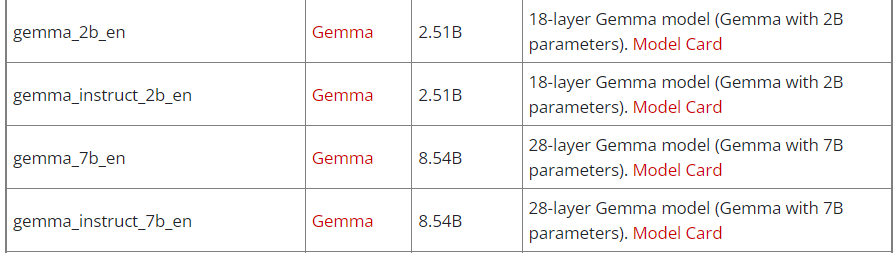

## Inference before fine tuning
In this section, you will query the model with various prompts to see how it responds.

In [37]:
prompt = template.format(
    instruction="What should I do on a trip to India?",
    response="",
)
print(gemma_lm.generate(prompt, max_length=256))

Instruction:
What should I do on a trip to India?

Response:
India is a country of contrasts. It is a land of extremes. It is a land of great beauty and great poverty. It is a land of great wealth and great poverty. It is a land of great diversity and great unity. It is a land of great tolerance and great intolerance. It is a land of great faith and great indifference. It is a land of great hope and great despair. It is a land of great potential and great limitations. It is a land of great opportunity and great danger. It is a land of great challenge and great opportunity. It is a land of great risk and great reward. It is a land of great beauty and great ugliness. It is a land of great hope and great despair. It is a land of great potential and great limitations. It is a land of great opportunity and great danger. It is a land of great risk and great reward. It is a land of great beauty and great ugliness. It is a land of great hope and great despair. It is a land of great potential a

The model just responds with a recommendation to take a trip to Europe.

In [38]:
prompt = template.format(
    instruction="Explain the process of AI developemant in a way that a child could understand.",
    response="",
)
print(gemma_lm.generate(prompt, max_length=256))

Instruction:
Explain the process of AI developemant in a way that a child could understand.

Response:
AI is a branch of computer science that deals with the development of intelligent machines that can perform tasks that normally require human intelligence. These tasks include speech recognition, image recognition, and natural language processing. AI is based on the idea of machine learning, which is the ability of a machine to learn from data and improve its performance over time. AI systems are often trained on large datasets of labeled examples, which are used to teach the system how to perform a task. AI systems can be used in a variety of applications, including autonomous vehicles, medical diagnosis, and language translation.

AI is a rapidly evolving field, and new techniques and algorithms are being developed all the time. AI systems are becoming increasingly sophisticated, and they are being used in a wide range of applications. AI is a field that is constantly changing and e

## LORA Fine Tunning
To enhance the model's responsiveness, we employ a technique called Low Rank Adaptation (LoRA) using the Databricks Dolly 15k dataset.

LoRA introduces trainable matrices with a specified rank to adjust the original weights of the model. This rank determines the dimensionality of these matrices, influencing the precision and expressiveness of the fine-tuning process.

Choosing the appropriate LoRA rank is crucial. A higher rank enables more detailed adjustments but increases the number of trainable parameters, leading to greater computational complexity. Conversely, a lower rank reduces computational overhead but may result in less precise adaptation.

In this tutorial, we adopt a LoRA rank of 4 as a starting point. This choice balances computational efficiency with the potential for performance improvement. By training the model with this rank and evaluating its performance on the task at hand, we can gauge the effectiveness of LoRA-based fine-tuning. Subsequently, iteratively increasing the rank allows us to explore further enhancements in performance while monitoring computational demands.

In [10]:
# Enable LoRA for the model and set the LoRA rank to 4.
gemma_lm.backbone.enable_lora(rank=4)
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,507,536,384 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,507,536,384 (9.34 GB)

 Trainable params: 1,363,968 (5.20 MB)

 Non-trainable params: 2,506,172,416 (9.34 GB)

Note that enabling LoRA reduces the number of trainable parameters significantly (from 2.5 billion to 1.3 million).

In [11]:
# Limit the input sequence length to 512 (to control memory usage).
gemma_lm.preprocessor.sequence_length = 128
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
gemma_lm.fit(data, epochs=1, batch_size=1)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 501s 435ms/step - loss: 1.3885 - sparse_categorical_accuracy: 0.5276


## Inference after fine-tuning
After fine-tuning, responses follow the instruction provided in the prompt.

In [12]:
prompt = template.format(
    instruction="What should I do on a trip to India?",
    response="",
)
print(gemma_lm.generate(prompt, max_length=256))

Instruction:
What should I do on a trip to India?

Response:
You should visit the Taj Mahal, a monument that is a symbol of India's love for art and architecture. You should also visit the Golden Temple in Amritsar. It is the holiest place for Sikhs.


Model now recommend to visit places in India.